# **Final Feature Engineering**

Após uma análise superficial de todas as features do dataset, vamos encontrar novas mudanças para minimizar a porcentagem de erro dos modelos de regressão que serão aplicados

In [915]:
import pickle #imports
import pathlib

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42

In [916]:
# Carrega o diretório de dados

DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

d:\machine-learning\ames\data


In [917]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [918]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [919]:
# Separa as features e o target

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [920]:
X.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

Um empecilho encontrado é de as variáveis categóricas estarem em um tipo customizado "category". Para facilitar a manipulação dos dados, transforaremos de volta em "object".

In [921]:
# transform the "category" columns back to normal objects

for col in X.select_dtypes('category'):
    X[col] = X[col].astype(object)

In [922]:
print(X.columns)

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Lot.Shape',
       'Land.Contour', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Roof.Style',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Type',
       'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch',
       'Screen.Porch', 'Pool.Area', 'Fence', 'Misc.Val', 'Mo.Sold', 'Yr.Sold',
   

# **Análise Inicial | Numéricas**

Vamos tentar analisar algumas features numéricas que podem ser transformadas

In [923]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['Lot.Frontage', 'Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1',
       'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Cars',
       'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold',
       'Yr.Sold', 'Garage.Age', 'Remod.Age', 'House.Age'],
      dtype='object')


In [924]:
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Shape', 'Land.Contour', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Roof.Style', 'Mas.Vnr.Type',
       'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond',
       'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating.QC',
       'Central.Air', 'Electrical', 'Kitchen.Qual', 'Functional',
       'Garage.Type', 'Garage.Finish', 'Paved.Drive', 'Fence', 'Sale.Type',
       'Sale.Condition', 'Condition', 'Exterior'],
      dtype='object')


In [925]:
import warnings

warnings.filterwarnings('ignore')

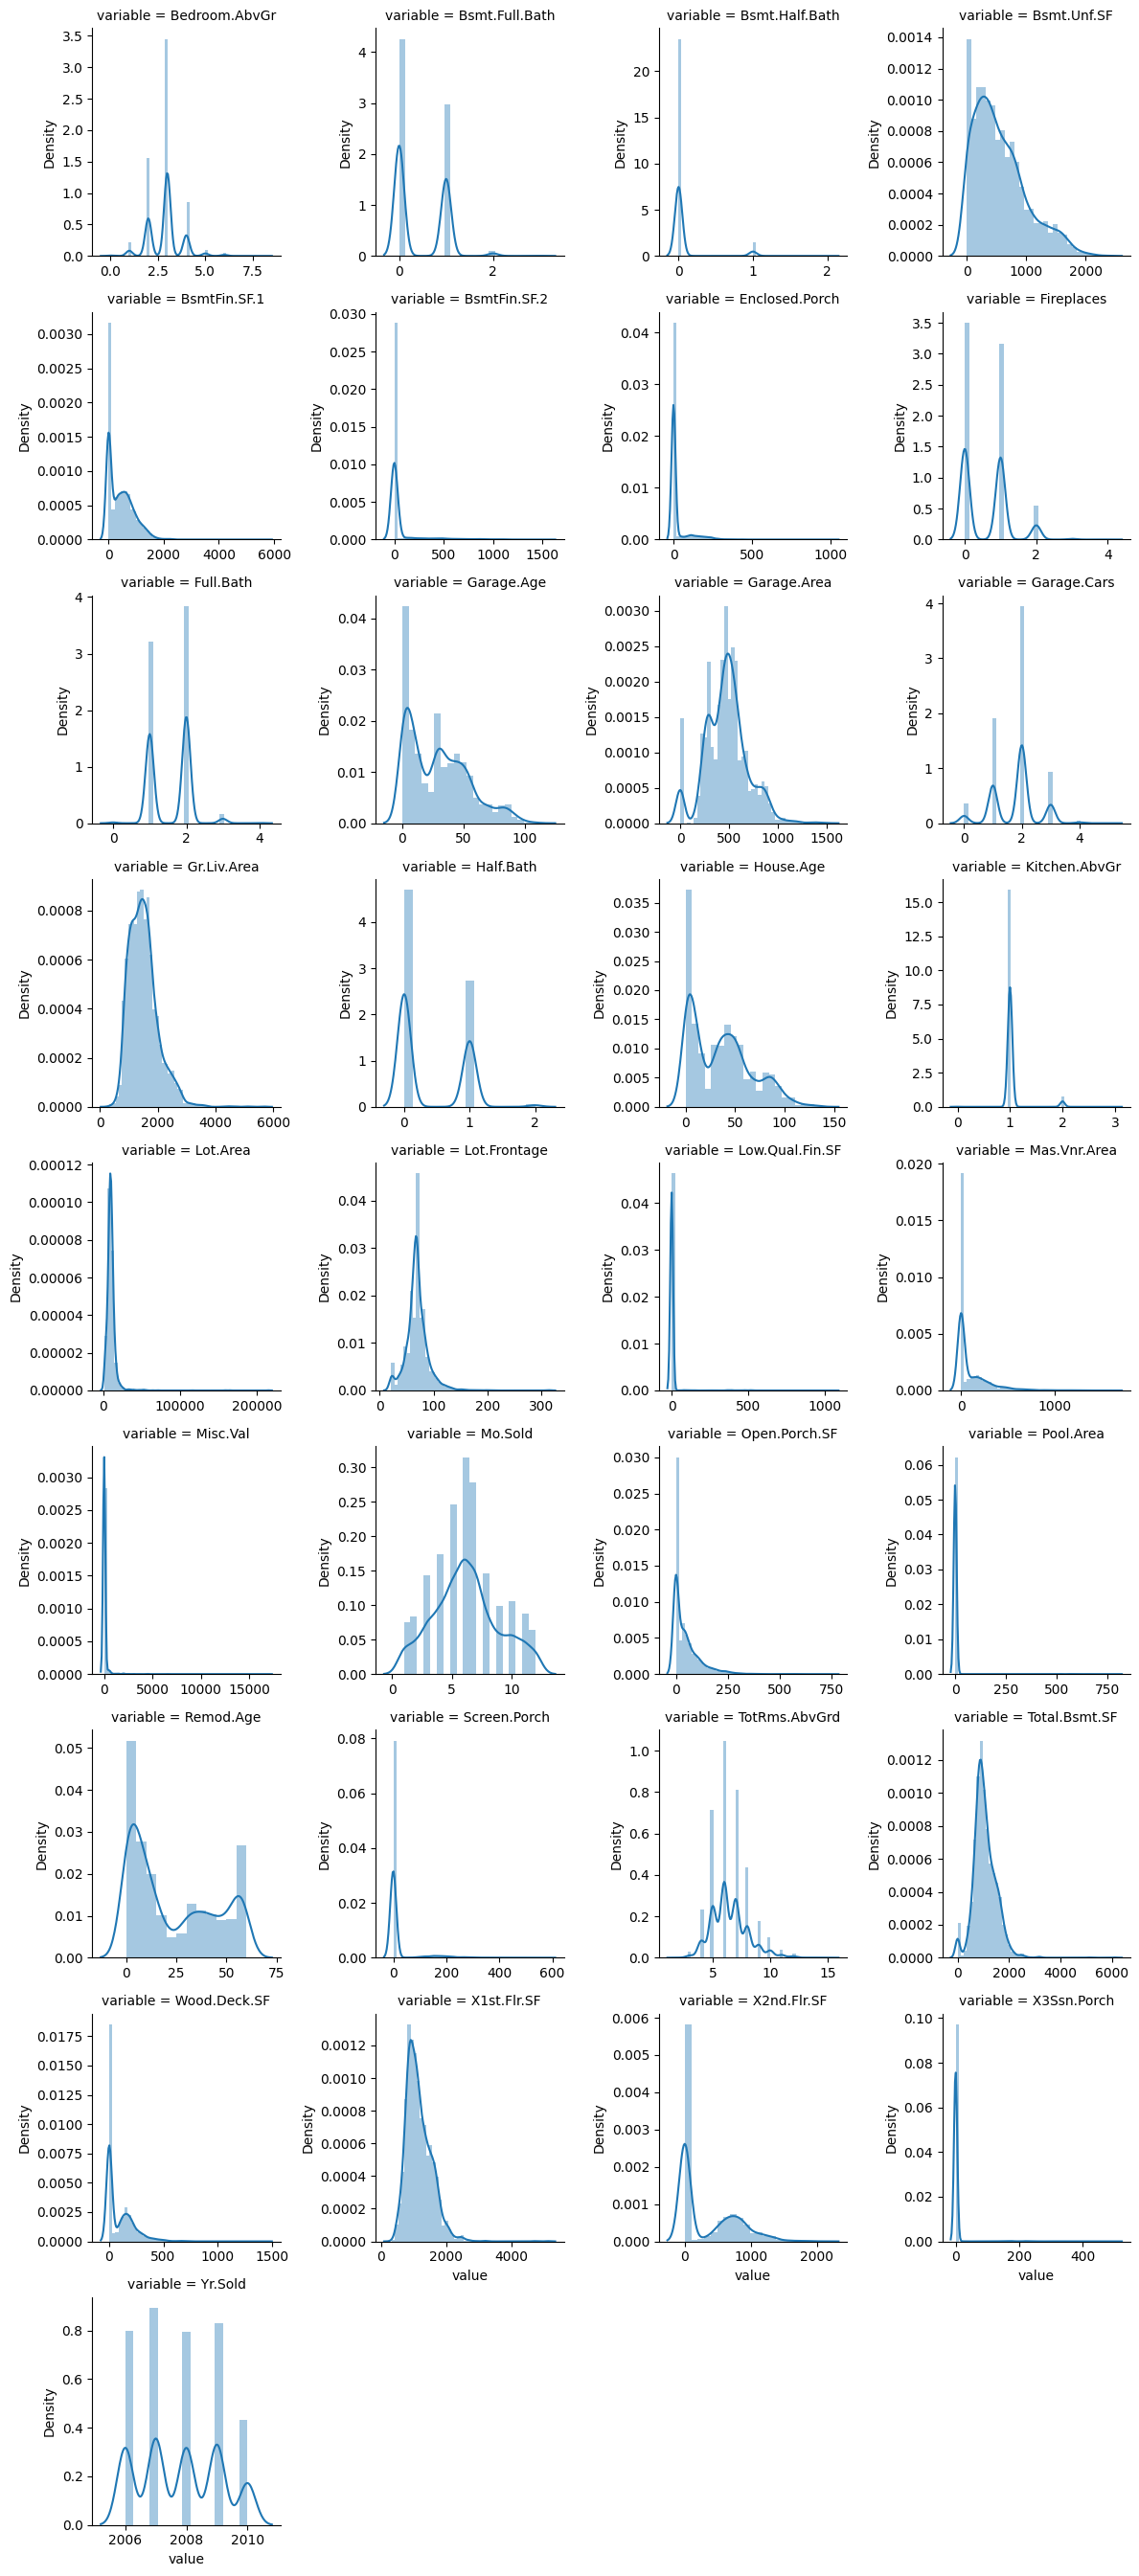

In [926]:
# Grid de todas as variáveis numéricas
# Fonte: https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Introduction


f = pd.melt(X, value_vars=sorted(numeric_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

Features que tem uma cauda, ou seja, um skew alto, pode ser interessante **aplicar log**:

* Bsmt.Unf.SF  
* Garage.Area  
* Gr.Liv.Area  
* Lot.Area  
* Lot.Frontage  
* Total.Bsmt.SF  
* X1st.Flr.SF

As variáveis `MS.SubClass`, `Mo.Sold` e `Yr.Sold`, originalmente são numéricas. No entanto, elas não se comportam como tal, já que, por exemplo, com um ano de compra maior, não significa algo mais positivo sobre o imóvel, apenas que foi comprado recentemente.

Portanto, essas features serão transformadas em categóricas, como strings.

In [927]:
X['MS.SubClass'] = X['MS.SubClass'].apply(lambda x: str(x))
X['Mo.Sold'] = X['Mo.Sold'].apply(lambda x: str(x))
X['Yr.Sold'] = X['Yr.Sold'].apply(lambda x: str(x))

numeric_cols = X.select_dtypes(include=[np.number]).columns
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Lot.Frontage', 'Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1',
       'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Cars',
       'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age',
       'Remod.Age', 'House.Age'],
      dtype='object')
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Shape', 'Land.Contour', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Roof.Style', 'Mas.Vnr.Type',
       'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond',
       'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating.QC',
       'Central.Air', 'Electrical', 'Kitchen.Qual', 'Functional',
       'Garage.Typ

# **Análise Inicial | Categóricas**

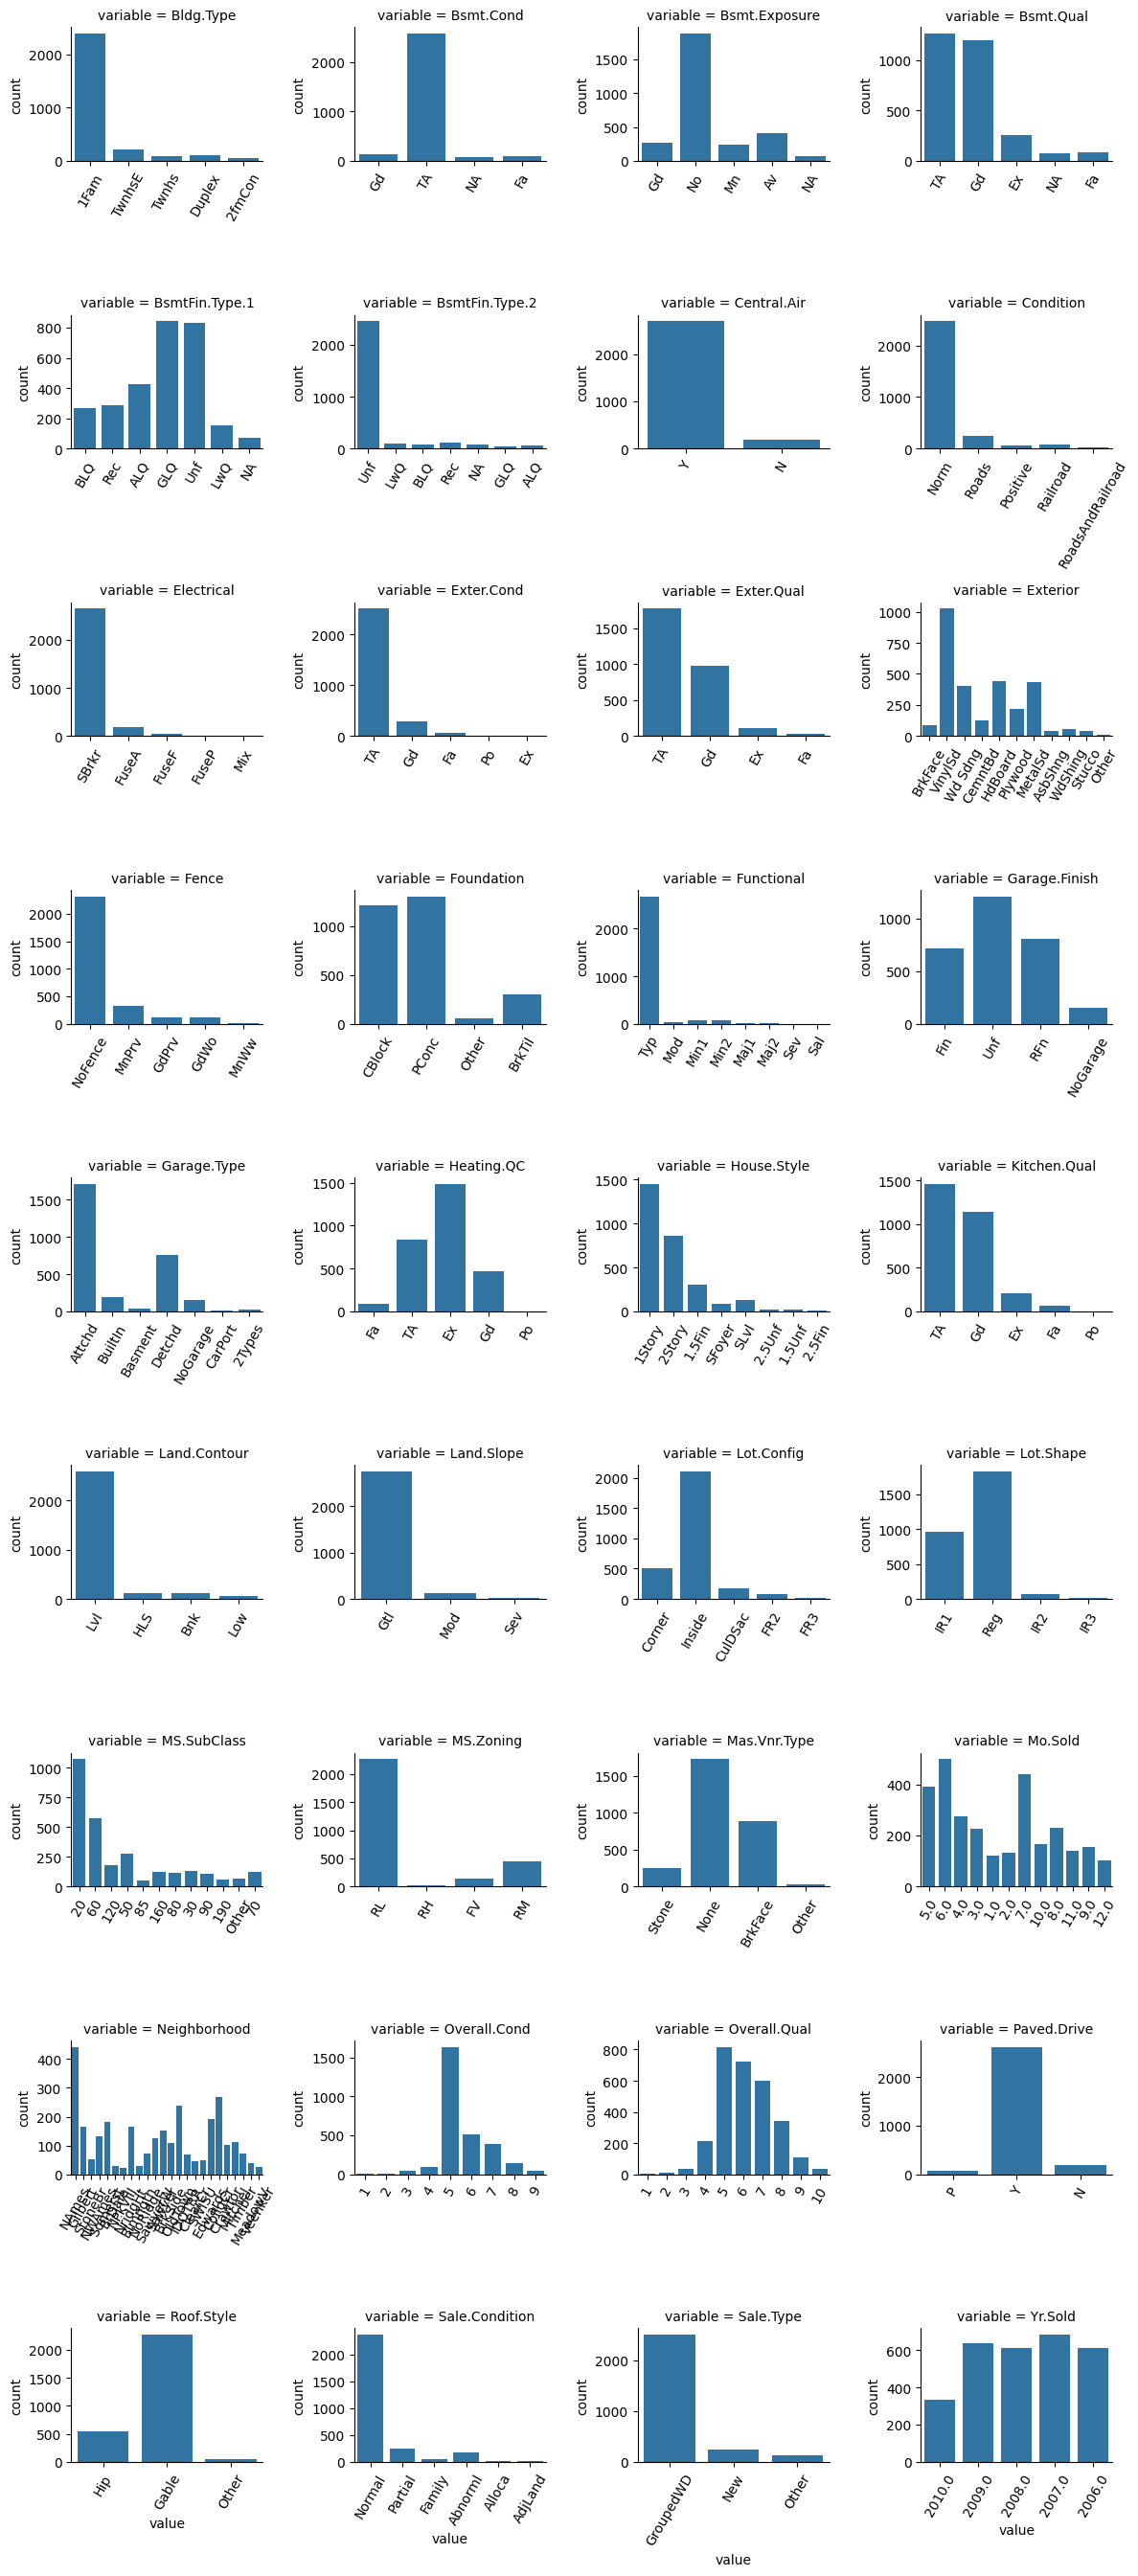

In [928]:
# Fonte: https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Introduction

f = pd.melt(X, value_vars=sorted(cat_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Percebe-se que, algumas features, apesar de categóricas, são ORDINAIS. Ou seja, a ordem dos valores importa, como por exemplo, a qualidade do material da casa. Portanto, essas features serão transformadas em numéricas, com valores de 0 a 5, dependendo de quantas possibilidades há dentro de uma categoria.

In [929]:
X['Lot.Shape'].replace({'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, inplace=True)

X['Land.Contour'].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

X['Land.Slope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

X['Exter.Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Exter.Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Bsmt.Qual'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Bsmt.Cond'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Bsmt.Exposure'].replace({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

X['Heating.QC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Kitchen.Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Functional'].replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

X['Garage.Finish'].replace({'NoGarage':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

X['Paved.Drive'].replace({'N':1, 'P':2, 'Y':3}, inplace=True)

In [930]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2877 non-null   object 
 1   MS.Zoning        2877 non-null   object 
 2   Lot.Frontage     2877 non-null   float64
 3   Lot.Area         2877 non-null   float64
 4   Lot.Shape        2877 non-null   int64  
 5   Land.Contour     2877 non-null   int64  
 6   Lot.Config       2877 non-null   object 
 7   Land.Slope       2877 non-null   int64  
 8   Neighborhood     2877 non-null   object 
 9   Bldg.Type        2877 non-null   object 
 10  House.Style      2877 non-null   object 
 11  Overall.Qual     2877 non-null   object 
 12  Overall.Cond     2877 non-null   object 
 13  Roof.Style       2877 non-null   object 
 14  Mas.Vnr.Type     2877 non-null   object 
 15  Mas.Vnr.Area     2877 non-null   float64
 16  Exter.Qual       2877 non-null   int64  
 17  Exter.Cond       28

Colunas atuais:

In [931]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond',
       'Bsmt.Exposure', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF',
       'Total.Bsmt.SF', 'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF',
       'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
       'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr',
       'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces',
       'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch',
       'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age', 'Remod.Age',
       'House.Age'],
      dtype='object')
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Config', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Roof.Style',
       'Mas.Vnr.Type', 'Foundation', 'BsmtFin.Type.1', 'BsmtFin.Type.2',
       'Central

# **Comparando cada feature numérica com o target**

Assim, poderemos teorizar quais variáveis podem ter grande influência na regressão.

Primeiro vamos buscar por relações lineares, ou seja, que possuem uma correlação alta com o target.

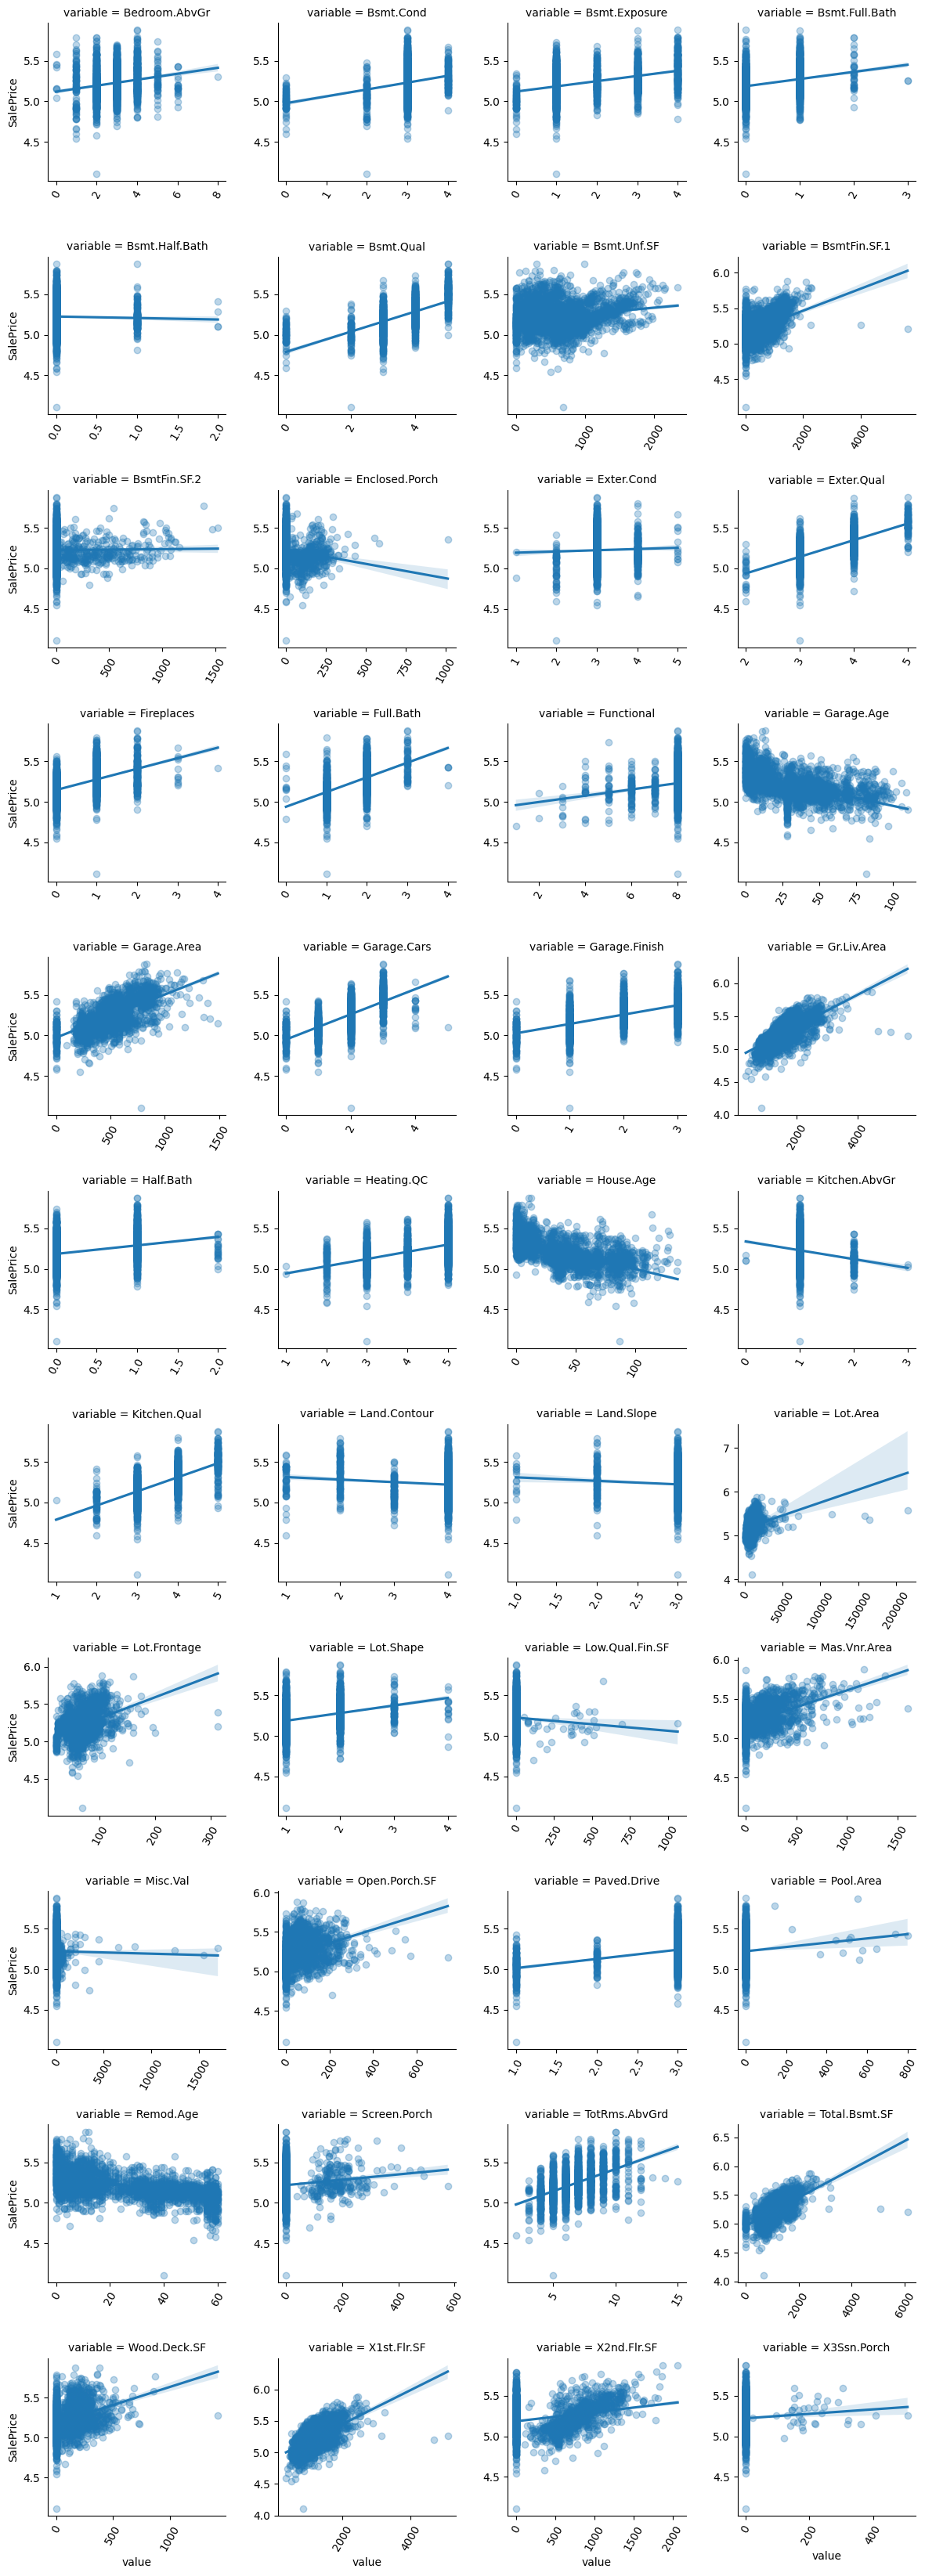

In [932]:
# Fonte: https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Introduction

# concat X and y
plot_data = pd.concat([X, y], axis=1) 

f = pd.melt(plot_data, id_vars=['SalePrice'], value_vars=sorted(numeric_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Algumas features claramente serão interessantes para o nosso modelo, como `Gr.Liv.Area`, `Garage.Cars` e `Garage.Area`.

Agora, vamos olhar a matriz de correlação completa:

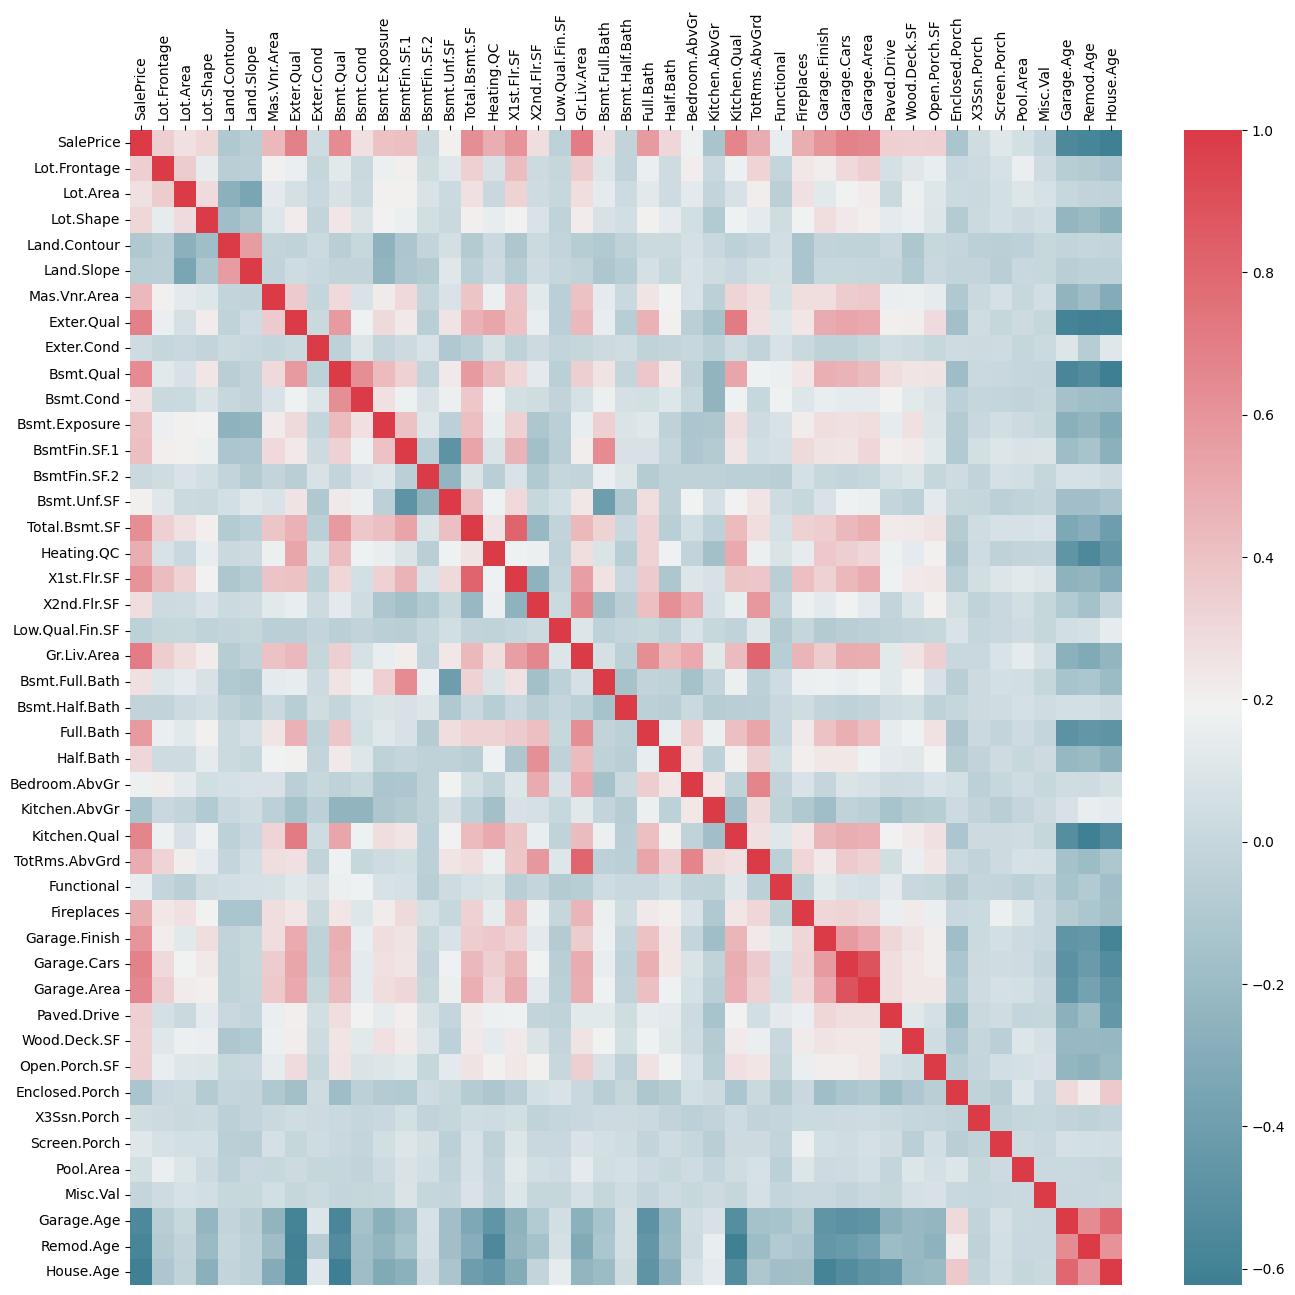

In [933]:
# Inspiração: https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Introduction

corr = plot_data[['SalePrice', *numeric_cols]].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Ordenando as correlações com o target, temos:

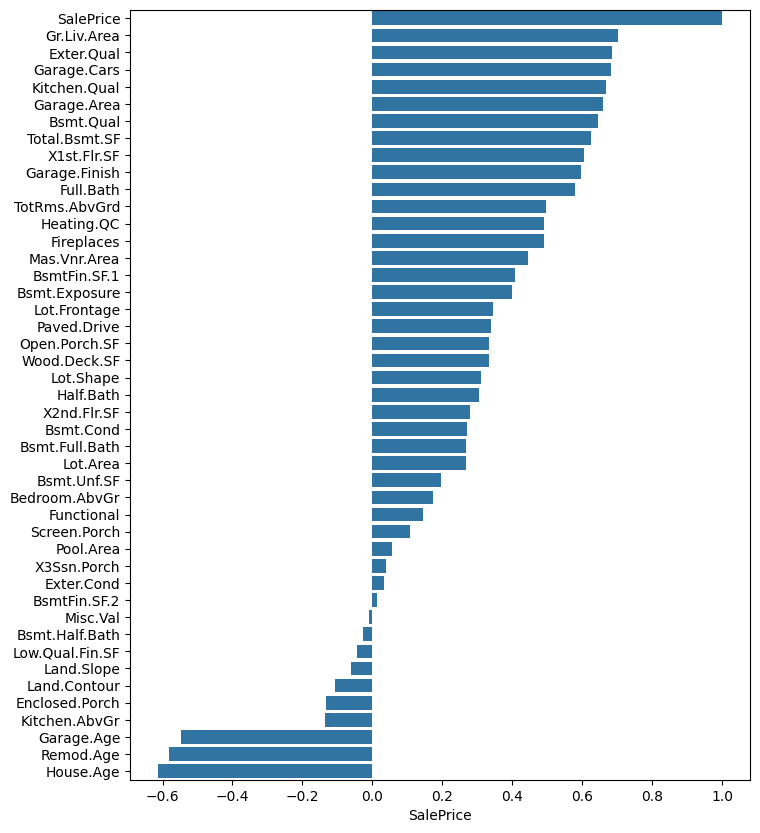

In [934]:
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(y=corr.index.values, x=corr['SalePrice'])
plt.show()

Para as features categóricas, Box Plot pode ser interessante para entender se ela é relevante para o modelo.

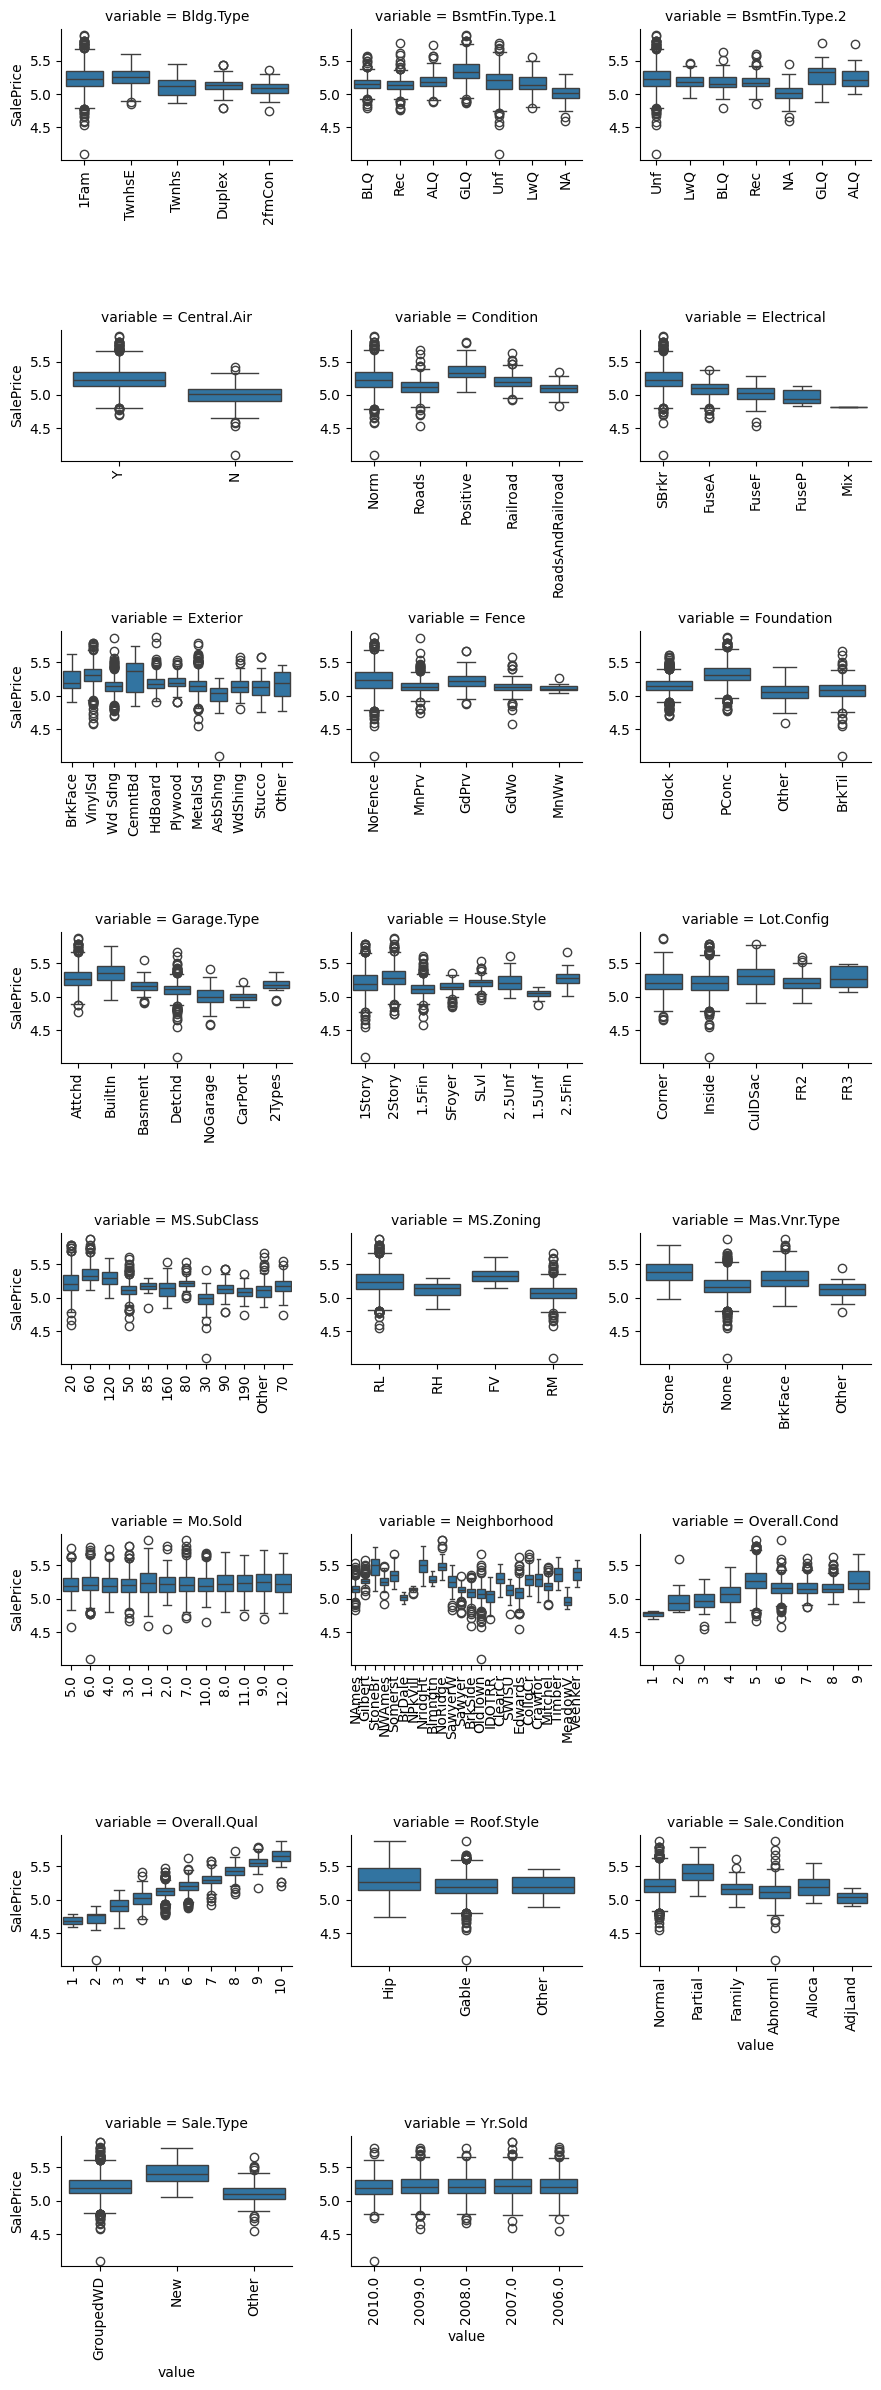

In [935]:
# Fonte: https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Introduction

f = pd.melt(plot_data, id_vars=['SalePrice'], value_vars=sorted(cat_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Overall.Qual e Overall.Cond são as features que mais se destacam por possuir maior variação do preço de venda entre as categorias.

TIRAR TESTE PORQUE NÃO SABEMOS O QUE É??

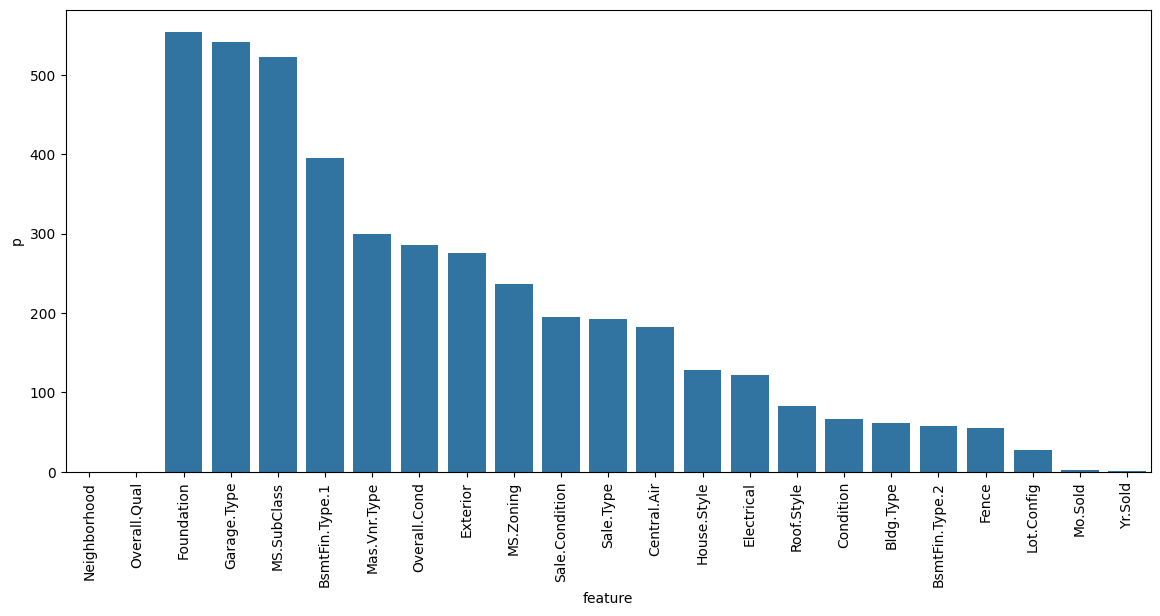

In [936]:
import scipy

anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_cols:
    group_prices = []
    for group in plot_data[cat].unique():
        group_prices.append(plot_data[plot_data[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=anova.feature, y=np.log(1./anova['p']))
#sns.barplot(x='feature', y='p', data=anova)
plt.xticks(rotation=90)
plt.show()

# **Corrigindo alguns erros**

Algumas poucas linhas indicam que não possuem nenhum Mas.Vnr, no entanto, possuem valores diferentes de 0 para a área de Mas.Vnr. Portanto, vamos substituir esses valores pelo mais comum.

In [937]:
filter = (X['Mas.Vnr.Area'] > 1) & (X['Mas.Vnr.Type'] == 'None') 
X[filter]

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Yr.Sold,Sale.Type,Sale.Condition,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
363,60,RL,68.0,10762.0,2,4,CulDSac,3,Gilbert,1Fam,...,2009.0,GroupedWD,Normal,Norm,False,False,VinylSd,10.0,10.0,10.0
403,160,RM,24.0,2368.0,1,4,Inside,3,BrDale,TwnhsE,...,2009.0,GroupedWD,Normal,Norm,False,False,HdBoard,39.0,39.0,39.0
441,20,RL,102.0,13514.0,2,4,Corner,3,NridgHt,1Fam,...,2009.0,GroupedWD,Normal,Norm,False,False,VinylSd,1.0,1.0,1.0
2528,60,RL,80.0,10400.0,1,4,Inside,3,NWAmes,1Fam,...,2006.0,GroupedWD,Normal,Norm,False,False,VinylSd,34.0,34.0,34.0


In [938]:
X.shape

(2877, 69)

In [939]:
filtro1 = (X['Mas.Vnr.Type'] == 'None') & (X['Mas.Vnr.Area'] > 1)
# Se tem área de veneer, mas não tem tipo, então o tipo é BrkFace, o mais comum
X.loc[filtro1, 'Mas.Vnr.Type'] = 'BrkFace'

filtro2 = (X['Mas.Vnr.Type'] == 'None') & (X['Mas.Vnr.Area'] == 1)
# Se tem área de veneer igual a 1, mas não tem tipo, trocaremos a área para 0
X.loc[filtro2, 'Mas.Vnr.Area'] = 0 # 1 sq ft is basically 0

# Para cada tipo de veneer, se a área for 0, trocaremos pela média da área daquele tipo de veneer
for vnr_type in X['Mas.Vnr.Type'].unique():
    filtro3 = (X['Mas.Vnr.Type'] == vnr_type) & (X['Mas.Vnr.Area'] == 0) # é o tipoo atual mas acusa não ter área
    X.loc[filtro3, 'Mas.Vnr.Area'] = X[X['Mas.Vnr.Type'] == vnr_type]['Mas.Vnr.Area'].mean() 

In [940]:
X.shape

(2877, 69)

In [941]:
# Checando as colunas

X[['Mas.Vnr.Type', 'Mas.Vnr.Area']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mas.Vnr.Type  2877 non-null   object 
 1   Mas.Vnr.Area  2877 non-null   float64
dtypes: float64(1), object(1)
memory usage: 67.4+ KB


Vamos checar se algum nulo ficou para trás na nossa análise.

In [942]:
missing_data = X.isnull().sum() / X.shape[0]
print(any(missing_data > 0))

False


# **Cuidado com Outliers**

Algumas features, são recomendadas pelo próprio autor para procurarmos por outliers. Vamos analisar brevemente.

In [943]:
plot_data = pd.concat([X, y], axis=1)

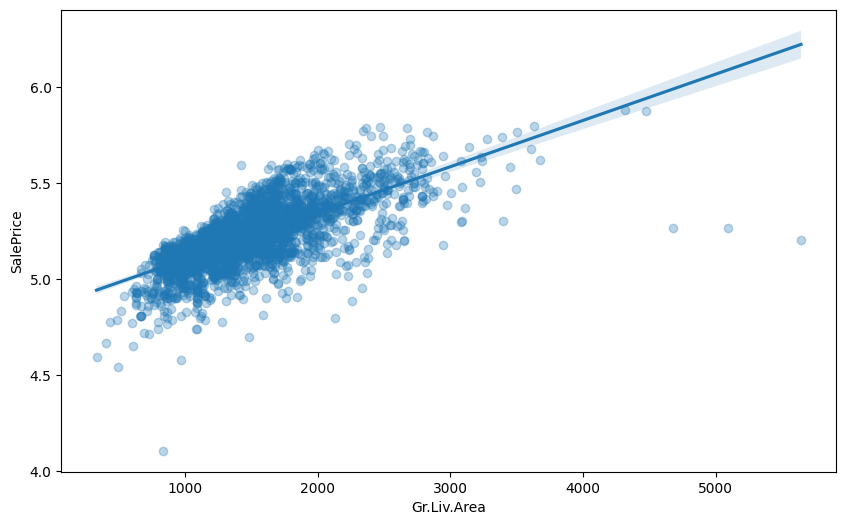

In [944]:
plt.figure(figsize=(10,6))
sns.regplot(x=plot_data['Gr.Liv.Area'], y=plot_data['SalePrice'], scatter_kws={'alpha':0.3}) # Fonte: https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Introduction
plt.show()

Como recomendação do próprio autor do dataset, é interessante cortarmos os outliers de +4000ft² de área!

*Portanto, nosso modelo não se capacita para prever o preço de imóveis com área acima de 4000ft².*

In [945]:
idx_to_drop = X[X['Gr.Liv.Area'] >= 4000].index
X.drop(idx_to_drop, inplace=True)
y.drop(idx_to_drop, inplace=True) # Dropa o target também

In [946]:
X.shape, y.shape

((2872, 69), (2872,))

# **Criação de novas features**

Vamos criar novas features que podem ser interessantes para o modelo, baseadas em features que fazem sentido juntas ou que se mostraram relevantes para o target nos testes iniciais.

## 1. Área total da casa

In [947]:
# Total Square Footage
X['Total.Floor.SF'] = X['X1st.Flr.SF'] + X['X2nd.Flr.SF'] # Total dos andares

X['Total.Porch.SF'] = X['Open.Porch.SF'] + X['Enclosed.Porch'] + X['X3Ssn.Porch'] + X['Screen.Porch'] # Total das varandas

# Total verdadeiro
X['Total.SF'] = X['Total.Bsmt.SF'] + X['Gr.Liv.Area'] + X['Total.Porch.SF'] + X['Total.Floor.SF'] + X['Garage.Area']


## 2. Total de banheiros

Half bath serão considerados como 0.5 vezes um banheiro usual.

In [948]:

# Total Bathrooms
X['Total.Bathrooms'] = X['Full.Bath'] + 0.5 * X['Half.Bath'] + X['Bsmt.Full.Bath'] + 0.5 * X['Bsmt.Half.Bath']


## 3. Features booleanas

Pode ser interessante para o nosso modelo termos features booleanas, como por exemplo, se a casa possui ou não um porão, baseado se a área é maior que zero.

In [949]:

# Booleans
X['Has.Basement'] = X['Total.Bsmt.SF'].apply(lambda x: 1 if x > 0 else 0)
X['Has.Garage'] = X['Garage.Area'].apply(lambda x: 1 if x > 0 else 0)
X['Has.Porch'] = X['Total.Porch.SF'].apply(lambda x: 1 if x > 0 else 0)
X['Has.Pool'] = X['Pool.Area'].apply(lambda x: 1 if x > 0 else 0)
X['Was.Completed'] = (X['Sale.Condition'] != 'Partial').astype(np.int64)


In [950]:
new_boolean_features = ['Has.Basement', 'Has.Garage', 'Has.Porch', 'Has.Pool', 'Was.Completed']

# Transforma essas features em tipo bool

for col in new_boolean_features:
    X[col] = X[col].astype(bool)

In [951]:
boolean_features = X.select_dtypes(include=['bool']).columns.tolist()

boolean_features

['HasShed',
 'HasAlley',
 'Has.Basement',
 'Has.Garage',
 'Has.Porch',
 'Has.Pool',
 'Was.Completed']

Separando as colunas finais em numéricas e categóricas:

In [952]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols = [f for f in numeric_cols if f not in boolean_features]
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age', 'Remod.Age', 'House.Age', 'Total.Floor.SF', 'Total.Porch.SF', 'Total.SF', 'Total.Bathrooms']
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Config', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Roof.Style',
       'Mas.Vnr.Type', 'Foundation', 'BsmtFin.Type.1', 'BsmtFin.Type.2',
       'Central.Air', 'Electrical', 'Garage.Typ

# **Finalizando tipos**

Percebemos que algumas features ainda estão com o tipo errado.

Por exemplo, `Overall.Qual` e `Overall.Cond` são features ordinais, mas estão como object. É interessante transformá-las em numéricas, como as outras features de qualidade.

In [953]:
X['Overall.Qual'] = X['Overall.Qual'].astype(np.int64)
X['Overall.Cond'] = X['Overall.Cond'].astype(np.int64)

## Extra Features

Com essa mudança, algumas features que podem ser interessantes serão criadas

In [954]:
# add feature Total.Overall - o "score" total de qualidade de uma residência

X['Total.Overall'] = X['Overall.Qual'] + X['Overall.Cond']

# add feature SqftPerRoom - a área por cômodo de uma residência

X['SqftPerRoom'] = X['Total.SF'] / (X['TotRms.AbvGrd'] + X['Total.Bathrooms'])

# add feature total rooms - total de cômodos de uma residência

X['Total.Rooms'] = X['TotRms.AbvGrd'] + X['Total.Bathrooms']

In [955]:
# add feature garage size (garage area + garage cars)

X['Garage.Size'] = X['Garage.Area'] + X['Garage.Cars']

In [956]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols = [f for f in numeric_cols if f not in boolean_features]
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope', 'Overall.Qual', 'Overall.Cond', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age', 'Remod.Age', 'House.Age', 'Total.Floor.SF', 'Total.Porch.SF', 'Total.SF', 'Total.Bathrooms', 'Total.Overall', 'SqftPerRoom', 'Total.Rooms', 'Garage.Size']
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Config', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Roof.Style', 'Mas.Vnr.Type', 'Foundation',
       'BsmtFin.Type.1', 'Bs

# **Aplicando Logaritmo**

Como comentado anteriormente, algumas features possuem uma cauda, ou seja, um skew alto. Portanto, vamos aplicar log nessas features para tentar normalizar a distribuição, o que é interessante para modelos lineares, como os que testaremos posteriormente.

Nosso limite de skew, usando a função `skew()` do pandas, será de 0.5. Qualquer valor maior que isso, será aplicado log.

In [957]:
# Fonte para o código: https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Introduction

skew_limit = 4.5
skew_vals = X[numeric_cols].skew()

print(skew_vals.sort_values(ascending=False))

Misc.Val           22.037372
Pool.Area          18.571897
Lot.Area           13.575655
Low.Qual.Fin.SF    12.311005
X3Ssn.Porch        11.342909
Kitchen.AbvGr       4.319620
BsmtFin.SF.2        4.124036
Enclosed.Porch      4.082637
Bsmt.Half.Bath      3.939523
Screen.Porch        3.916073
Mas.Vnr.Area        2.545617
Open.Porch.SF       2.398233
Total.Porch.SF      2.248274
Wood.Deck.SF        1.843587
Exter.Cond          1.483241
Lot.Frontage        1.278132
Lot.Shape           1.244562
Bsmt.Exposure       1.121876
Bsmt.Unf.SF         0.920153
Gr.Liv.Area         0.854131
X1st.Flr.SF         0.852371
X2nd.Flr.SF         0.843328
Total.Floor.SF      0.823473
BsmtFin.SF.1        0.820740
Exter.Qual          0.805604
Fireplaces          0.718787
TotRms.AbvGrd       0.704859
Half.Bath           0.691604
Total.SF            0.674083
Garage.Age          0.663640
Overall.Cond        0.652110
Bsmt.Full.Bath      0.609975
House.Age           0.604809
Total.Rooms         0.588027
Total.Bathroom

In [958]:

high_skew = skew_vals[abs(skew_vals) > skew_limit]
skew_cols = high_skew.index.tolist()

In [959]:
print(high_skew.sort_values(ascending=False))

Misc.Val           22.037372
Pool.Area          18.571897
Lot.Area           13.575655
Low.Qual.Fin.SF    12.311005
X3Ssn.Porch        11.342909
Land.Slope         -5.092512
Functional         -5.146202
dtype: float64


In [960]:
for col in skew_cols:
    X[col] = np.log1p(X[col])
    X[col] = X[col].astype(np.float64)

# ***Salvando os dados finais***

In [ ]:
clean_data_path = DATA_DIR / 'processed' / 'ames_final.pkl'

In [ ]:
data = pd.concat([X, y], axis=1)

with open(clean_data_path, 'wb') as file:
    pickle.dump(data, file)